# Notebook for Coursera Capstone Project.

In [253]:
# Importing Libraries
import pandas as pd
import numpy as np

In [254]:
print('Hello Capstone Project Course!')

Hello Capstone Project Course!


# Coursera Capstone Project
## Finding similar regions in Indian Cities (Mumbai, Chennai & Bengluru)
Identifying & Clustering regions in above three cities to find areas which share silmilarity based on number of popular venues (Types of Restaurants, Stores, Tourist Destinations etc)

# Introduction

In last decade, cities in India have developed at astonishing rate. With developing cities House pricing also goes up. If a resident in one city wants to relocate to different city or neighbourhood, which city/neighbourhood should he choose that is most similar to his current neighbourhood. This project will try to answer this question. We will base our similarity on a kind of Blueprint for neighbourhoods based on popular venues such as Restaurants, Malls, Natural Areas, Tourist Destinations etc.

Audience of this project might include Home Buyers or Renters, Real Estate Agents. Also this project might be helpful to those who are looking to open new Businesses to find appropriate locations to open their news business.

# Data

To complete this project we will require data including names of neighbourhoods in Mumbai, Chennai & Bengluru. With popular venues for each neighbourhood, along with location data which should include Latitude & Longitude. 

To get neighbourhoods names we'll have to scrape Wikipedia pages. To find venues we'll use Foursquare API (Venue Recommendation), & for Location data we'll use Mapquest API for cities where location data is not available from Wikipedia Page.

In [255]:
# Importing Libraries
import numpy as np 
import pandas as pd 
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
import json
from geopy.geocoders import Nominatim
import requests
from pandas.io.json import json_normalize
import matplotlib.cm as cm
import matplotlib.colors as colors
from sklearn.cluster import KMeans
import folium
import bs4 as bs

### Let's get neighbourhood data from Wikipedia

For Chennai we have neighbourhood as well as location data avaible on Wikipedia

In [256]:
url = "https://en.wikipedia.org/wiki/List_of_neighbourhoods_of_Chennai"
url

'https://en.wikipedia.org/wiki/List_of_neighbourhoods_of_Chennai'

In [257]:
df = requests.get(url)
df

<Response [200]>

In [258]:
#Creating Beutiful Soup Obeject from df
sop = bs.BeautifulSoup(df.content,'lxml')
sop

<!DOCTYPE html>
<html class="client-nojs" dir="ltr" lang="en">
<head>
<meta charset="utf-8"/>
<title>List of neighbourhoods of Chennai - Wikipedia</title>
<script>document.documentElement.className="client-js";RLCONF={"wgBreakFrames":!1,"wgSeparatorTransformTable":["",""],"wgDigitTransformTable":["",""],"wgDefaultDateFormat":"dmy","wgMonthNames":["","January","February","March","April","May","June","July","August","September","October","November","December"],"wgRequestId":"YCPgDgpAMNUAAiWmVtoAAABD","wgCSPNonce":!1,"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":!1,"wgNamespaceNumber":0,"wgPageName":"List_of_neighbourhoods_of_Chennai","wgTitle":"List of neighbourhoods of Chennai","wgCurRevisionId":1004415716,"wgRevisionId":1004415716,"wgArticleId":9736473,"wgIsArticle":!0,"wgIsRedirect":!1,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["Use dmy dates from February 2019","Use Indian English from February 2019","All Wikipedia articles written in Indian Eng

In [259]:
df1 = sop.find_all('table')[1]
df1 = str(df1)
df1

'<table class="wikitable sortable">\n<tbody><tr>\n<th>Area\n</th>\n<th>Location\n</th>\n<th>Latitude\n</th>\n<th>Longitude\n</th></tr>\n<tr>\n<td>Adambakkam\n</td>\n<td>South and East Chennai\n</td>\n<td>12.988\n</td>\n<td>80.2047\n</td></tr>\n<tr>\n<td>Adyar\n</td>\n<td>South and East Chennai\n</td>\n<td>13.0012\n</td>\n<td>80.2565\n</td></tr>\n<tr>\n<td>Alandur\n</td>\n<td>South and East Chennai\n</td>\n<td>12.9975\n</td>\n<td>80.2006\n</td></tr>\n<tr>\n<td>Alapakkam\n</td>\n<td>West Chennai\n</td>\n<td>13.049\n</td>\n<td>80.1673\n</td></tr>\n<tr>\n<td>Alwarthirunagar\n</td>\n<td>West Chennai\n</td>\n<td>13.0426\n</td>\n<td>80.184\n</td></tr>\n<tr>\n<td>Ambattur\n</td>\n<td>West Chennai\n</td>\n<td>13.1143\n</td>\n<td>80.1548\n</td></tr>\n<tr>\n<td>Aminjikarai\n</td>\n<td>West Chennai\n</td>\n<td>13.0698\n</td>\n<td>80.2245\n</td></tr>\n<tr>\n<td>Anna Nagar\n</td>\n<td>West Chennai\n</td>\n<td>13.085\n</td>\n<td>80.2101\n</td></tr>\n<tr>\n<td>Annanur\n</td>\n<td>West Chennai\n</td>\n

In [260]:
df2 = pd.read_html(df1)
df2

[                       Area                              Location  Latitude  \
 0                Adambakkam                South and East Chennai  12.98800   
 1                     Adyar                South and East Chennai  13.00120   
 2                   Alandur                South and East Chennai  12.99750   
 3                 Alapakkam                          West Chennai  13.04900   
 4           Alwarthirunagar                          West Chennai  13.04260   
 5                  Ambattur                          West Chennai  13.11430   
 6               Aminjikarai                          West Chennai  13.06980   
 7                Anna Nagar                          West Chennai  13.08500   
 8                   Annanur                          West Chennai  13.11840   
 9                Arumbakkam                          West Chennai  13.07240   
 10              Ashok Nagar                          West Chennai  13.03730   
 11                    Avadi            

In [261]:
df_c = pd.read_json(df2[0].to_json(orient='records'))
df_c

Area                              Location  Latitude  \
0                Adambakkam                South and East Chennai  12.98800   
1                     Adyar                South and East Chennai  13.00120   
2                   Alandur                South and East Chennai  12.99750   
3                 Alapakkam                          West Chennai  13.04900   
4           Alwarthirunagar                          West Chennai  13.04260   
5                  Ambattur                          West Chennai  13.11430   
6               Aminjikarai                          West Chennai  13.06980   
7                Anna Nagar                          West Chennai  13.08500   
8                   Annanur                          West Chennai  13.11840   
9                Arumbakkam                          West Chennai  13.07240   
10              Ashok Nagar                          West Chennai  13.03730   
11                    Avadi                          West Chennai  13.10670   
12               Ayappakkam                          West Chennai  13.09250   
13             Basin Bridge                         North Chennai  13.10140   
14             Besant Nagar                South and East Chennai  13.00030   
15                 Broadway                         North Chennai  19.22740   
16                  Central                         North Chennai  13.08250   
17                  Chetpet                South and East Chennai  13.07140   
18                  Choolai                         North Chennai  13.09190   
19              MMDA Colony                          West Chennai  13.06650   
20           Defence Colony                          West Chennai  13.02620   
21                   Egmore                South and East Chennai  13.07320   
22                   Ennore                         North Chennai  13.21460   
23              Erukanchery                         North Chennai  13.12368   
24              George Town                         North Chennai  13.09690   
25            Gerugambakkam                          West Chennai  13.01360   
26              Gopalapuram                South and East Chennai  13.04890   
27                   Guindy                South and East Chennai  13.00670   
28             Hastinapuram                South and East Chennai  12.93870   
29               ICF Colony                         North Chennai  13.09810   
30              Injambakkam                South and East Chennai  12.91980   
31              Irumbuliyur                South and East Chennai  12.91720   
32           Iyyapanthangal                          West Chennai  13.03810   
33                  Jamalia                         North Chennai  13.10480   
34               K.K. Nagar                          West Chennai  13.04100   
35                 Kadaperi                South and East Chennai  12.93360   
36              Kallikuppam                         North Chennai  13.13097   
37              Karambakkam                          West Chennai  13.03760   
38               Kathirvedu                         North Chennai  13.15210   
39              Kathivakkam                         North Chennai  13.20460   
40             Keelkattalai                South and East Chennai  12.95560   
41              Kodungaiyur                         North Chennai  13.14096   
42              Kolappakkam                South and East Chennai  13.01010   
43                 Kolathur                         North Chennai  13.12400   
44                 Korattur                          West Chennai  13.10820   
45               Korukkupet                         North Chennai  13.11860   
46                  Kosapet                         North Chennai  13.09220   
47              Kottivakkam                South and East Chennai  12.96820   
48            Kovilambakkam                South and East Chennai  12.94090   
49                Koyambedu                          West Chennai  13.069

In [262]:
df_c.isnull().sum()

Area         0
Location     0
Latitude     0
Longitude    0
dtype: int64

In [263]:
df_c.drop(['Location'],axis=1,inplace=True)

In [264]:
df_c['City'] = 'CHE'

In [265]:
df_c

Area  Latitude  Longitude City
0                Adambakkam  12.98800   80.20470  CHE
1                     Adyar  13.00120   80.25650  CHE
2                   Alandur  12.99750   80.20060  CHE
3                 Alapakkam  13.04900   80.16730  CHE
4           Alwarthirunagar  13.04260   80.18400  CHE
5                  Ambattur  13.11430   80.15480  CHE
6               Aminjikarai  13.06980   80.22450  CHE
7                Anna Nagar  13.08500   80.21010  CHE
8                   Annanur  13.11840   80.12460  CHE
9                Arumbakkam  13.07240   80.21020  CHE
10              Ashok Nagar  13.03730   80.21230  CHE
11                    Avadi  13.10670   80.09700  CHE
12               Ayappakkam  13.09250   80.13720  CHE
13             Basin Bridge  13.10140   80.27040  CHE
14             Besant Nagar  13.00030   80.26670  CHE
15                 Broadway  19.22740   72.97390  CHE
16                  Central  13.08250   80.27550  CHE
17                  Chetpet  13.07140   80.24170  CHE
18                  Choolai  13.09190   80.26420  CHE
19              MMDA Colony  13.06650   80.21470  CHE
20           Defence Colony  13.02620   80.20220  CHE
21                   Egmore  13.07320   80.26090  CHE
22                   Ennore  13.21460   80.32030  CHE
23              Erukanchery  13.12368   80.24828  CHE
24              George Town  13.09690   80.28650  CHE
25            Gerugambakkam  13.01360   80.13530  CHE
26              Gopalapuram  13.04890   80.25860  CHE
27                   Guindy  13.00670   80.22060  CHE
28             Hastinapuram  12.93870   80.14610  CHE
29               ICF Colony  13.09810   80.21950  CHE
30              Injambakkam  12.91980   80.25110  CHE
31              Irumbuliyur  12.91720   80.10770  CHE
32           Iyyapanthangal  13.03810   80.13540  CHE
33                  Jamalia  13.10480   80.25330  CHE
34               K.K. Nagar  13.04100   80.19940  CHE
35                 Kadaperi  12.93360   80.12540  CHE
36              Kallikuppam  13.13097   80.17486  CHE
37              Karambakkam  13.03760   80.15320  CHE
38               Kathirvedu  13.15210   80.20010  CHE
39              Kathivakkam  13.20460   80.31674  CHE
40             Keelkattalai  12.95560   80.18690  CHE
41              Kodungaiyur  13.14096   80.24818  CHE
42              Kolappakkam  13.01010   80.14920  CHE
43                 Kolathur  13.12400   80.21210  CHE
44                 Korattur  13.10820   80.18340  CHE
45               Korukkupet  13.11860   80.27800  CHE
46                  Kosapet  13.09220   80.25510  CHE
47              Kottivakkam  12.96820   80.25990  CHE
48            Kovilambakkam  12.94090   80.18510  CHE
49                Koyambedu  13.06940   80.19480  CHE
50               Kundrathur  12.99770   80.09720  CHE
51             Lakshmipuram  13.13610   80.20050  CHE
52            M.G.R. Garden  13.02500   80.18230  CHE
53             M.G.R. Nagar  13.03520   80.19730  CHE
54             M.K.B. Nagar  13.12128   80.25873  CHE
55               Madhavaram  13.14880   80.23060  CHE
56   Madhavaram Milk Colony  13.15050   80.24190  CHE
57               Madipakkam  12.96470   80.19610  CHE
58              Maduravoyal  13.06560   80.16080  CHE
59                Mambakkam  12.84029   80.15343  CHE
60                   Manali  13.17790   80.27010  CHE
61          Manali New Town  13.19330   80.27080  CHE
62               manapakkam  13.02130   80.18320  CHE
63                  Mangadu  13.04188   80.11501  CHE
64             Manjambakkam  13.16691   80.22942  CHE
65                  Mannadi  13.09280   80.28930  CHE
66              Mathur MMDA  13.17240   80.24788  CHE
67               Medavakkam  12.91710   80.19230  CHE
68                   Minjur  13.27890   80.26230  CHE
69                Mogappair  13.08370   80.17500  CHE
70               Moolakadai  13.12960   80.24160  CHE
71              Mowlivakkam  13.02172   80.14146  CHE
72                 Mudichur  12.91020   80.07171  CHE
73             Mugalivakkam

For Mumbai too we have location data available from Wikipedia along with names.

In [266]:
urlm = "https://en.wikipedia.org/wiki/List_of_neighbourhoods_in_Mumbai"
dfm = requests.get(urlm)
sopm = bs.BeautifulSoup(dfm.content,'lxml')
df1m = sopm.find_all('table')[0]
df1m = str(df1m)
df2m = pd.read_html(df1m)
df_m = pd.read_json(df2m[0].to_json(orient='records'))
df_m.drop(['Location'],axis=1,inplace=True)

In [267]:
df_m['City'] = 'MUM'

In [268]:
df_m.head()

Area   Latitude  Longitude City
0            Amboli  19.129300  72.843400  MUM
1  Chakala, Andheri  19.111388  72.860833  MUM
2        D.N. Nagar  19.124085  72.831373  MUM
3    Four Bungalows  19.124714  72.827210  MUM
4       Lokhandwala  19.130815  72.829270  MUM

For Bengluru, Wikipedia page do not have location data.

Also there are 8 different tables for different regions of Bengluru.

I don't have any experiance with Web Scaping and I am bit short on time hence I am doing this in not so elegant way.

In [269]:
urlb = "https://en.wikipedia.org/wiki/List_of_neighbourhoods_in_Bangalore"
dfb = requests.get(urlb)
sopb = bs.BeautifulSoup(dfb.content,'lxml')

In [270]:
df1b1 = sopb.find_all('table')[0]
df1b2 = sopb.find_all('table')[1]
df1b3 = sopb.find_all('table')[2]
df1b4 = sopb.find_all('table')[3]
df1b5 = sopb.find_all('table')[4]
df1b6 = sopb.find_all('table')[5]
df1b7 = sopb.find_all('table')[6]
df1b8 = sopb.find_all('table')[7]

In [271]:
df1b1 = str(df1b1)
df1b2 = str(df1b2)
df1b3 = str(df1b3)
df1b4 = str(df1b4)
df1b5 = str(df1b5)
df1b6 = str(df1b6)
df1b7 = str(df1b7)
df1b8 = str(df1b8)

In [272]:
df2b1 =pd.read_html(df1b1)
df2b2 =pd.read_html(df1b2)
df2b3= pd.read_html(df1b3)
df2b4= pd.read_html(df1b4)
df2b5= pd.read_html(df1b5)
df2b6= pd.read_html(df1b6)
df2b7= pd.read_html(df1b7)
df2b8= pd.read_html(df1b8)

In [273]:
df_b1 = pd.read_json(df2b1[0].to_json(orient='records'))
df_b2 = pd.read_json(df2b2[0].to_json(orient='records'))
df_b3 = pd.read_json(df2b3[0].to_json(orient='records'))
df_b4 = pd.read_json(df2b4[0].to_json(orient='records'))
df_b5 = pd.read_json(df2b5[0].to_json(orient='records'))
df_b6 = pd.read_json(df2b6[0].to_json(orient='records'))
df_b7 = pd.read_json(df2b7[0].to_json(orient='records'))
df_b8 = pd.read_json(df2b8[0].to_json(orient='records'))

In [274]:
frames = [df_b1, df_b2, df_b3, df_b4, df_b5, df_b6, df_b7, df_b8]

In [275]:
df_b = pd.concat(frames)

In [276]:
df_b.drop(['Image','Summary'],axis=1,inplace=True)


In [277]:
df_b = df_b.reset_index(drop=True)

In [278]:
df_b["Latitude"] = ''
df_b["Longitude"] = ''

In [279]:
df_b['City'] = 'Bengaluru'

In [280]:
df_b.head()

Name Latitude Longitude       City
0    Cantonment area                     Bengaluru
1             Domlur                     Bengaluru
2        Indiranagar                     Bengaluru
3  Jeevanbheemanagar                     Bengaluru
4        Malleswaram                     Bengaluru

Lets get location data for Bengluru.

In [281]:
# Add Mapquest credentials to run the following code
MAPQUEST_KEY = 'HyblFOQX05sdfaSEnAwp0DuDv8E4Ie0d'
MAPQUEST_SECRET = '4FVFUQ1OLvNgAGXp'


In [282]:
for index, row in df_b.iterrows():
    location = row['Name'] + "," + row['City'] + "," + 'Bengalore' + "," + 'India'
    url = 'https://www.mapquestapi.com/geocoding/v1/address?key={}&inFormat=kvp&outFormat=json&location={}&thumbMaps=false'.format(
    MAPQUEST_KEY, 
    location)
    response = requests.get(url).json()
    if not response['results'][0]['locations']:
        continue
    df_b.at[index,'Latitude'] = response['results'][0]['locations'][0]['latLng']['lat']
    df_b.at[index,'Longitude'] = response['results'][0]['locations'][0]['latLng']['lng']
    
df_b.to_csv('df_C.csv', sep=',',index=False)


In [283]:
df_b.head()

Name Latitude Longitude       City
0    Cantonment area   12.987   77.6635  Bengaluru
1             Domlur  12.9564   77.6389  Bengaluru
2        Indiranagar  13.0245   77.4939  Bengaluru
3  Jeevanbheemanagar  12.9023   77.7148  Bengaluru
4        Malleswaram  12.9969   77.5698  Bengaluru

In [284]:
df_b.rename(columns={'Name': "Area"},inplace=True)
df_b.head()

Area Latitude Longitude       City
0    Cantonment area   12.987   77.6635  Bengaluru
1             Domlur  12.9564   77.6389  Bengaluru
2        Indiranagar  13.0245   77.4939  Bengaluru
3  Jeevanbheemanagar  12.9023   77.7148  Bengaluru
4        Malleswaram  12.9969   77.5698  Bengaluru

Concat all three Dataframes into one

In [285]:
frame = [df_c, df_b, df_m]

In [286]:
dfa = pd.concat(frame)

In [287]:
dfa = dfa.reset_index(drop=True)

In [288]:
dfa

Area Latitude Longitude  \
0                                      Adambakkam   12.988   80.2047   
1                                           Adyar  13.0012   80.2565   
2                                         Alandur  12.9975   80.2006   
3                                       Alapakkam   13.049   80.1673   
4                                 Alwarthirunagar  13.0426    80.184   
5                                        Ambattur  13.1143   80.1548   
6                                     Aminjikarai  13.0698   80.2245   
7                                      Anna Nagar   13.085   80.2101   
8                                         Annanur  13.1184   80.1246   
9                                      Arumbakkam  13.0724   80.2102   
10                                    Ashok Nagar  13.0373   80.2123   
11                                          Avadi  13.1067    80.097   
12                                     Ayappakkam  13.0925   80.1372   
13                                   Basin Bridge  13.1014   80.2704   
14                                   Besant Nagar  13.0003   80.2667   
15                                       Broadway  19.2274   72.9739   
16                                        Central  13.0825   80.2755   
17                                        Chetpet  13.0714   80.2417   
18                                        Choolai  13.0919   80.2642   
19                                    MMDA Colony  13.0665   80.2147   
20                                 Defence Colony  13.0262   80.2022   
21                                         Egmore  13.0732   80.2609   
22                                         Ennore  13.2146   80.3203   
23                                    Erukanchery  13.1237   80.2483   
24                                    George Town  13.0969   80.2865   
25                                  Gerugambakkam  13.0136   80.1353   
26                                    Gopalapuram  13.0489   80.2586   
27                                         Guindy  13.0067   80.2206   
28                                   Hastinapuram  12.9387   80.1461   
29                                     ICF Colony  13.0981   80.2195   
30                                    Injambakkam  12.9198   80.2511   
31                                    Irumbuliyur  12.9172   80.1077   
32                                 Iyyapanthangal  13.0381   80.1354   
33                                        Jamalia  13.1048   80.2533   
34                                     K.K. Nagar   13.041   80.1994   
35                                       Kadaperi  12.9336   80.1254   
36                                    Kallikuppam   13.131   80.1749   
37                                    Karambakkam  13.0376   80.1532   
38                                     Kathirvedu  13.1521   80.2001   
39                                    Kathivakkam  13.2046   80.3167   
40                                   Keelkattalai  12.9556   80.1869   
41                                    Kodungaiyur   13.141   80.2482   
42                                    Kolappakkam  13.0101   80.1492   
43                                       Kolathur   13.124   80.2121   
44                                       Korattur  13.1082   80.1834   
45                                     Korukkupet  13.1186    80.278   
46                                        Kosapet  13.0922   80.2551   
47                                    Kottivakkam  12.9682   80.2599   
48                                  Kovilambakkam  12.9409   80.1851   
49                                      Koyambedu  13.0694   80.1948   
50                                     Kundrathur  12.9977   80.0972   
51                                   Lakshmipuram  13.1361   80.2005   
52                                  M.G.R. Garden   13.025   80.1823   
53                                   M.G.R. Nagar  13.0352   80.1973   
54                                   M.K.B. Nagar  13.1213   80.2587   
55           

To verify location data is correct we will map it out using Folium

In [289]:

# Use geopy library to get the latitude and longitude values of India
address = 'India'

geolocator = Nominatim(user_agent="dfa")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of India are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of India are 22.3511148, 78.6677428.


In [290]:
# create map of the Northwest US using latitude and longitude values
map_ind = folium.Map(location=[latitude, longitude], zoom_start=5)

# add markers to map
for lat, lng, name in zip(dfa['Latitude'], dfa['Longitude'], dfa['Area']):
    label = '{}'.format(name)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_ind)  
    
map_ind

We have two wrong Co-ordinates one is Nehru Nagar while other being Hindu Colony. We could drop them but here instead we will enter correct co-ordinates manually.

In [291]:
dfa['Index'] = dfa.index

In [292]:
dfa[dfa.Area=='Hindu colony']

Area Latitude Longitude City  Index
323  Hindu colony  19.0208   19.0208  MUM    323

In [293]:
dfa[dfa.Area=='Nehru Nagar']

Area Latitude Longitude City  Index
282  Nehru Nagar  15.4517    74.972  MUM    282

Replacing with correct Latitude and Longitude values

In [294]:
dfa.loc[dfa.index == 282, 'Latitude'] = 19.0640
dfa.loc[dfa.index == 282, 'Longitude'] = 72.8826

In [295]:
dfa.loc[dfa.index == 323, 'Latitude'] = 19.0197
dfa.loc[dfa.index == 323, 'Longitude'] = 72.8479

In [296]:
dfa.drop('Index',axis=1, inplace=True)
dfa.head()

Area Latitude Longitude City
0       Adambakkam   12.988   80.2047  CHE
1            Adyar  13.0012   80.2565  CHE
2          Alandur  12.9975   80.2006  CHE
3        Alapakkam   13.049   80.1673  CHE
4  Alwarthirunagar  13.0426    80.184  CHE

### Now we will use foresquare API to get popular venues

In [297]:
# I don't know how to hide these!
CLIENT_ID = 'GFQCKM2PQUABZDMT22M2BUEF1WVXVOTPXEOAD10IFT1UIPLB'
CLIENT_SECRET = '33XCV0NRLASEVKBGMMHXLAPLLS1F45MSKCOZUNSXLW1KPBAL'
VERSION = '20180605'

In [298]:
# To check everything works we'll test on first area
city_latitude = dfa.loc[0, 'Latitude'] # City latitude value
city_longitude = dfa.loc[0, 'Longitude'] # City longitude value

area_name = dfa.loc[0, 'Area'] # Name
area_city = dfa.loc[0, 'City'] # State

print(f'Latitude and longitude values of {area_name}, {area_city} are, {city_latitude}, {city_longitude}')

Latitude and longitude values of Adambakkam, CHE are, 12.988, 80.2047


In [299]:
# Get the top 100 venues within the default city radius
LIMIT = 100 # limit of number of venues returned by Foursquare API

# create URL
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    city_latitude, 
    city_longitude, 
    LIMIT)

results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '6025510ecc02e04c9b478091'},
 'response': {'suggestedFilters': {'header': 'Tap to show:',
   'filters': [{'name': 'Open now', 'key': 'openNow'}]},
  'suggestedRadius': 2766,
  'headerLocation': 'Chennai',
  'headerFullLocation': 'Chennai',
  'headerLocationGranularity': 'city',
  'totalResults': 104,
  'suggestedBounds': {'ne': {'lat': 13.012345847154632,
    'lng': 80.22966376840455},
   'sw': {'lat': 12.966120493727475, 'lng': 80.1842500416171}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '50fbfed3d86c1bb70c07680c',
       'name': 'Luxe Cinemas',
       'location': {'address': 'Phoenix Market City',
        'crossStreet': 'Velachery',
        'lat': 12.991041454121694,
        'lng': 80.21696190277495,
        'labeledLatLngs': [

In [300]:
# Function to get categories of venue
def category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [301]:
# Make Dataframe of Venue and Category
venue = results['response']['groups'][0]['items']
    
venues = json_normalize(venue) # flatten JSON


filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
venues = venues.loc[:, filtered_columns]

# filter the category for each row
venues['venue.categories'] = venues.apply(category_type, axis=1)


venues.columns = [col.split(".")[-1] for col in venues.columns]

venues.head()

name             categories        lat        lng
0         Luxe Cinemas              Multiplex  12.991041  80.216962
1  Phoenix Market City          Shopping Mall  12.991710  80.217297
2             Rajdhani  Rajasthani Restaurant  12.991081  80.217003
3                IMAX®              Multiplex  12.990639  80.216310
4                 Zara         Clothing Store  12.991411  80.216854

This has worked now we'll make function to do this for all the Areas.

In [302]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['City', 
                  'City Latitude', 
                  'City Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [303]:
# Run function for all areas
popular_venues = getNearbyVenues(names=dfa['Area'],
                                   latitudes=dfa['Latitude'],
                                   longitudes=dfa['Longitude'])

Adambakkam
Adyar
Alandur
Alapakkam
Alwarthirunagar
Ambattur
Aminjikarai
Anna Nagar
Annanur
Arumbakkam
Ashok Nagar
Avadi
Ayappakkam
Basin Bridge
Besant Nagar
Broadway
Central
Chetpet
Choolai
MMDA Colony
Defence Colony
Egmore
Ennore
Erukanchery
George Town
Gerugambakkam
Gopalapuram
Guindy
Hastinapuram
ICF Colony
Injambakkam
Irumbuliyur
Iyyapanthangal
Jamalia
K.K. Nagar
Kadaperi
Kallikuppam
Karambakkam
Kathirvedu
Kathivakkam
Keelkattalai
Kodungaiyur
Kolappakkam
Kolathur
Korattur
Korukkupet
Kosapet
Kottivakkam
Kovilambakkam
Koyambedu
Kundrathur
Lakshmipuram
M.G.R. Garden
M.G.R. Nagar
M.K.B. Nagar
Madhavaram
Madhavaram Milk Colony
Madipakkam
Maduravoyal
Mambakkam
Manali
Manali New Town
manapakkam
Mangadu
Manjambakkam
Mannadi
Mathur MMDA
Medavakkam
Minjur
Mogappair
Moolakadai
Mowlivakkam
Mudichur
Mugalivakkam
Mylapore
Nagalkeni
Nandambakkam
Nanganallur
Naravarikuppam
Neelankarai
Nerkundrum
Nesapakkam
New Washermenpet
Nolambur
Old Washermenpet
Oragadam
Otteri
Padi
Palavakkam
Pallavaram
Pallik

KeyError: 'groups'

In [ ]:
popular_venues.to_csv('Venues.csv', sep=',')

In [305]:
popular_venues = pd.read_csv('Venues.csv')

In [306]:
popular_venues.shape

(2682, 8)

In [308]:
popular_venues.drop('Unnamed: 0',1,inplace=True)

In [309]:
popular_venues.head()

City  City Latitude  City Longitude                       Venue  \
0  Adambakkam         12.988         80.2047  Venkateshwara Super Market   
1  Adambakkam         12.988         80.2047                       Ibaco   
2  Adambakkam         12.988         80.2047           Deepam Restaurant   
3  Adambakkam         12.988         80.2047               Shreeji Foods   
4  Adambakkam         12.988         80.2047            ibaco Adambakkam   

   Venue Latitude  Venue Longitude        Venue Category  
0       12.986320        80.205168      Department Store  
1       12.988729        80.205646          Dessert Shop  
2       12.985380        80.205281     Indian Restaurant  
3       12.985735        80.202530  Fast Food Restaurant  
4       12.987358        80.200504        Ice Cream Shop

Dataframe is ready.

Now we have to calculate how many times each category appears for particular area.

In [310]:

# one hot encoding
venue_oh = pd.get_dummies(popular_venues[['Venue Category']], prefix="", prefix_sep="")

# Add area column back to dataframe
venue_oh['Area'] = popular_venues['City'] 

# move city column to the first column
columns = [venue_oh.columns[-1]] + list(venue_oh.columns[:-1])
venue_oh = venue_oh[columns]


In [311]:
venue_oh.shape

(2682, 245)

Well have to group rows by city mean of frequency for each venue category.

In [312]:
venue_grouped = venue_oh.groupby('Area').mean().reset_index()

In [313]:
venue_grouped

Area       ATM  \
0                               Aarey Milk Colony  0.000000   
1                                      Adambakkam  0.000000   
2                                           Adyar  0.000000   
3                                        Agripada  0.000000   
4                                         Alandur  0.000000   
5                                       Alapakkam  0.000000   
6                                  Altamount Road  0.000000   
7                                 Alwarthirunagar  0.000000   
8                                        Ambattur  0.000000   
9                                          Amboli  0.000000   
10                                    Aminjikarai  0.000000   
11                                    Amrut Nagar  0.000000   
12                                     Anna Nagar  0.000000   
13                                        Annanur  0.000000   
14                                        Arekere  0.000000   
15                                     Arumbakkam  0.000000   
16                                         Asalfa  0.000000   
17                                    Ashok Nagar  0.000000   
18                                          Avadi  0.000000   
19                                     BTM Layout  0.000000   
20                                 Ballard Estate  0.000000   
21                                   Banashankari  0.000000   
22                                      Banaswadi  0.000000   
23                            Bandstand Promenade  0.000000   
24                                   Bangur Nagar  0.000000   
25                                   Basavanagudi  0.000000   
26                              Basaveshwaranagar  0.000000   
27                                   Basin Bridge  0.000000   
28                                          Begur  0.000000   
29                                      Bellandur  0.000000   
30                                   Besant Nagar  0.000000   
31                                        Bhandup  0.000000   
32                                      Bhayandar  0.000000   
33                                     Bhuleshwar  0.000000   
34                                   Bommanahalli  0.000000   
35                                    Bommasandra  1.000000   
36                                   Breach Candy  0.000000   
37                                       Broadway  0.000000   
38                                  C.G.S. colony  0.000000   
39                                 CV Raman Nagar  0.250000   
40                                Cantonment area  0.000000   
41                                Carmichael Road  0.000000   
42                                          Cavel  0.000000   
43                                        Central  0.000000   
44                               Chakala, Andheri  0.000000   
45                                     Chandivali  0.000000   
46                                        Charkop  0.000000   
47                                        Chembur  0.000000   
48                                   Chengalpattu  0.000000   
49                                        Chetpet  0.000000   
50                                   Chira Bazaar  0.000000   
51                                        Choolai  0.000000   
52                                    Chor Bazaar  0.000000   
53                                     Churchgate  0.000000   
54                                   Cotton Green  0.000000   
55                                   Cuffe Parade  0.000000   
56                                   Cumbala Hill  0.000000   
57                                    Currey Road  0.000000   
58                                     D.N. Nagar  0.000000   
59                                    Dagdi Chawl  0.000000   
60                                         Dahisa  0.000000   
61                                    Dava Bazaar  0.000000   
62                                 Defence Colony  0.000000   
63           

In [314]:
venue_grouped.shape

(293, 245)

Now lets find five most common venues for each area

In [315]:
num_top_venues = 5

for area in venue_grouped['Area']:
    print("----"+area+"----")
    temp = venue_grouped[venue_grouped['Area'] == area].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Aarey Milk Colony----
                             venue  freq
0                             Lake   1.0
1                              ATM   0.0
2                     Neighborhood   0.0
3       Modern European Restaurant   0.0
4  Molecular Gastronomy Restaurant   0.0


----Adambakkam----
                  venue  freq
0        Ice Cream Shop   0.2
1      Department Store   0.2
2     Indian Restaurant   0.2
3  Fast Food Restaurant   0.2
4          Dessert Shop   0.2


----Adyar----
                       venue  freq
0          Indian Restaurant  0.25
1                Pizza Place  0.12
2                       Café  0.12
3           Asian Restaurant  0.06
4  Middle Eastern Restaurant  0.06


----Agripada----
               venue  freq
0             Bakery  0.33
1  Indian Restaurant  0.17
2        Coffee Shop  0.17
3                Gym  0.17
4         Restaurant  0.17


----Alandur----
               venue  freq
0  Indian Restaurant  0.33
1      Train Station  0.33
2      Metro Station 

           venue  freq
0  Train Station   0.2
1         Bakery   0.2
2     Whisky Bar   0.2
3          Plaza   0.2
4     Hookah Bar   0.2


----Cuffe Parade----
                             venue  freq
0                           Garden   1.0
1                              ATM   0.0
2                     Neighborhood   0.0
3       Modern European Restaurant   0.0
4  Molecular Gastronomy Restaurant   0.0


----Cumbala Hill----
          venue  freq
0          Café  0.14
1   Coffee Shop  0.07
2        Bakery  0.07
3  Concert Hall  0.03
4    Smoke Shop  0.03


----Currey Road----
                      venue  freq
0                 Rest Area   0.2
1         Indian Restaurant   0.2
2                     Plaza   0.2
3               Coffee Shop   0.2
4  Maharashtrian Restaurant   0.2


----D.N. Nagar----
                  venue  freq
0           Pizza Place   0.2
1  Arts & Entertainment   0.2
2  Gym / Fitness Center   0.2
3           Snack Place   0.2
4     Indian Restaurant   0.2


----Dagdi

4          Juice Bar  0.06


----Kanjurmarg----
                       venue  freq
0                        ATM  0.25
1                     Bakery  0.25
2                  Multiplex  0.25
3              Grocery Store  0.25
4  Middle Eastern Restaurant  0.00


----Karambakkam----
                venue  freq
0   Indian Restaurant  0.50
1        Burger Joint  0.17
2    Asian Restaurant  0.17
3  Travel & Transport  0.17
4                 ATM  0.00


----Karapakkam----
                           venue  freq
0           Fast Food Restaurant  0.29
1              Indian Restaurant  0.14
2         Furniture / Home Store  0.14
3  Vegetarian / Vegan Restaurant  0.14
4                  Movie Theater  0.14


----Kathirvedu----
                             venue  freq
0                      Snack Place   1.0
1                              ATM   0.0
2        Middle Eastern Restaurant   0.0
3       Modern European Restaurant   0.0
4  Molecular Gastronomy Restaurant   0.0


----Kathivakkam----
        

4               Gym   0.2


----Mowlivakkam----
                             venue  freq
0                Indian Restaurant  0.50
1                      Pizza Place  0.25
2                         Bus Stop  0.25
3          New American Restaurant  0.00
4  Molecular Gastronomy Restaurant  0.00


----Mugalivakkam----
              venue  freq
0    Ice Cream Shop   0.2
1       Auto Garage   0.1
2       Flower Shop   0.1
3  Department Store   0.1
4              Park   0.1


----Mumbai Central----
                  venue  freq
0  Fast Food Restaurant  0.15
1      Department Store  0.15
2           Pizza Place  0.08
3           Snack Place  0.08
4         Movie Theater  0.08


----Muthukadu----
               venue  freq
0  Indian Restaurant  0.25
1         Theme Park  0.25
2        Coffee Shop  0.25
3             Museum  0.25
4                ATM  0.00


----Mylapore----
            venue  freq
0  Clothing Store  0.17
1           Train  0.08
2     Flea Market  0.08
3     Music Store  0.08
4

              venue  freq
0  Department Store   0.4
1              Café   0.2
2   Paintball Field   0.2
3            Bakery   0.2
4         Multiplex   0.0


----Rajarajeshwari Nagar----
                             venue  freq
0                   Ice Cream Shop  0.33
1                      Snack Place  0.33
2                 Department Store  0.33
3          New American Restaurant  0.00
4  Molecular Gastronomy Restaurant  0.00


----Ramamurthy Nagar----
                  venue  freq
0      Department Store  0.25
1                  Park  0.25
2            Restaurant  0.25
3  Gym / Fitness Center  0.25
4   Monument / Landmark  0.00


----Ramapuram----
                     venue  freq
0        Convenience Store  0.25
1           Breakfast Spot  0.25
2                   Bakery  0.25
3                BBQ Joint  0.25
4  New American Restaurant  0.00


----Royapuram----
               venue  freq
0  Indian Restaurant  0.25
1      Movie Theater  0.25
2       Burger Joint  0.25
3             

4        Coffee Shop   0.2


----West Mambalam----
               venue  freq
0  Indian Restaurant   0.4
1  Convenience Store   0.2
2      Jewelry Store   0.2
3        Snack Place   0.2
4   Parsi Restaurant   0.0


----Whitefield----
                     venue  freq
0        Indian Restaurant  0.29
1  Fruit & Vegetable Store  0.14
2  South Indian Restaurant  0.14
3                    Hotel  0.14
4                    Plaza  0.14


----Worli----
                venue  freq
0  Seafood Restaurant  0.15
1      Ice Cream Shop  0.15
2      Sandwich Place  0.15
3   Indian Restaurant  0.08
4              Bakery  0.08


----Yelahanka----
                             venue  freq
0                              ATM   0.5
1                      Bus Station   0.5
2               Miscellaneous Shop   0.0
3  Molecular Gastronomy Restaurant   0.0
4              Monument / Landmark   0.0


----Yeshwanthpur----
                             venue  freq
0               Miscellaneous Shop   0.5
1            

In [316]:
# sort values in decreasing order

def common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [317]:
# Create a dataframe with top 5 venues for each city

num_top_venues = 5

indicators = ['st', 'nd', 'rd']

# Create columns according to number of top venues
columns = ['Area']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))



In [318]:
# Create a new dataframe
venues_sorted = pd.DataFrame(columns=columns)
venues_sorted['Area'] = venue_grouped['Area']

for ind in np.arange(venue_grouped.shape[0]):
    venues_sorted.iloc[ind, 1:] = common_venues(venue_grouped.iloc[ind, :], num_top_venues)

venues_sorted.head()

Area 1st Most Common Venue 2nd Most Common Venue  \
0  Aarey Milk Colony                  Lake           Yoga Studio   
1         Adambakkam  Fast Food Restaurant        Ice Cream Shop   
2              Adyar     Indian Restaurant                  Café   
3           Agripada                Bakery            Restaurant   
4            Alandur         Train Station     Indian Restaurant   

  3rd Most Common Venue 4th Most Common Venue 5th Most Common Venue  
0            Donut Shop     Food & Drink Shop                  Food  
1     Indian Restaurant          Dessert Shop      Department Store  
2           Pizza Place     Electronics Store           Bus Station  
3                   Gym           Coffee Shop     Indian Restaurant  
4        Breakfast Spot         Metro Station           Flower Shop

Now applying Kmeans Clusting to this dataframe

In [319]:
k = 3

venues_cluster = venue_grouped.drop('Area', axis=1)

# Run k-means clustering
cluster = KMeans(n_clusters=k, random_state=0).fit(venues_cluster)

# Check cluster labels generated for each row in the dataframe
cluster.labels_[0:400]

array([2, 2, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 0,
       0, 2, 2, 0, 1, 2, 2, 2, 0, 2, 2, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 0, 2, 0, 2, 2, 2, 2, 0, 0, 0, 2, 0, 2, 2, 2, 0,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 0, 0, 0, 2, 2, 0, 2, 2, 0, 2, 0, 2, 0,
       2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 1, 0, 2, 0, 2, 0, 2, 2, 2, 2, 2,
       2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 1, 2, 2, 2, 1, 2, 2, 0, 2, 2, 2, 2, 2, 2, 0, 0, 2, 2, 2, 0, 2,
       2, 2, 0, 0, 0, 2, 2, 0, 1, 2, 2, 0, 2, 2, 0, 2, 0, 2, 2, 0, 2, 2,
       2, 0, 2, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 1, 2, 2,
       2, 2, 2, 0, 0, 2, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 2, 0, 1, 2, 2, 0, 2, 2, 2, 2,
       1, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 0, 0, 2, 2, 2, 2])

Now lets use elbow method to get best value for k

In [ ]:
#!pip install yellowbrick

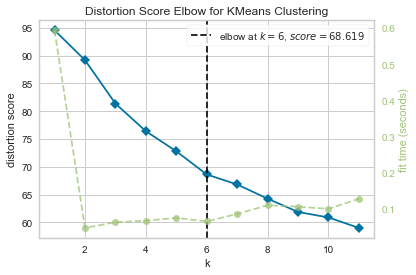

In [320]:
# Instantiate the clustering model and visualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,12))

visualizer.fit(venues_cluster)    # Fit the data to the visualizer
visualizer.poof()    # Draw/show/poof the data

In [321]:
k = 6

venues_cluster = venue_grouped.drop('Area', axis=1)

# Run k-means clustering
cluster = KMeans(n_clusters=k, random_state=0).fit(venues_cluster)

# Check cluster labels generated for each row in the dataframe
cluster.labels_[0:400]

array([1, 3, 3, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 3, 1, 1, 1, 1, 3,
       3, 1, 1, 3, 4, 2, 1, 1, 3, 1, 1, 3, 1, 5, 1, 1, 1, 1, 3, 1, 1, 1,
       1, 1, 1, 3, 1, 1, 3, 1, 3, 1, 1, 1, 1, 3, 3, 3, 1, 3, 1, 1, 1, 3,
       1, 3, 3, 1, 1, 2, 3, 1, 1, 3, 3, 3, 1, 1, 3, 1, 1, 3, 0, 3, 1, 3,
       1, 1, 1, 1, 1, 1, 3, 1, 1, 0, 1, 4, 3, 1, 3, 1, 3, 3, 1, 1, 1, 1,
       3, 1, 3, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 5, 1, 1, 1, 2, 0, 1, 1, 5,
       1, 4, 1, 1, 1, 4, 1, 1, 3, 1, 0, 1, 1, 1, 1, 3, 3, 1, 1, 1, 3, 1,
       1, 1, 3, 3, 3, 1, 1, 3, 4, 5, 3, 3, 1, 1, 3, 1, 3, 1, 1, 3, 1, 5,
       1, 3, 2, 3, 1, 3, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 3, 0, 0, 4, 1, 1,
       1, 1, 1, 3, 3, 1, 3, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 3, 3, 1, 1, 1,
       1, 3, 5, 3, 5, 2, 0, 5, 3, 0, 0, 1, 1, 3, 4, 1, 1, 3, 1, 0, 1, 1,
       4, 1, 2, 3, 1, 1, 1, 1, 3, 1, 2, 1, 1, 1, 3, 1, 1, 1, 1, 0, 1, 1,
       3, 0, 3, 1, 1, 3, 1, 1, 1, 1, 2, 3, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1,
       3, 3, 3, 1, 5, 1, 1])

Now we should make new column with these labels and add it to dataframes before so that we get one dataframe with Area, Location, Common Venues and cluster labels.

In [322]:
dfa.head()

Area Latitude Longitude City
0       Adambakkam   12.988   80.2047  CHE
1            Adyar  13.0012   80.2565  CHE
2          Alandur  12.9975   80.2006  CHE
3        Alapakkam   13.049   80.1673  CHE
4  Alwarthirunagar  13.0426    80.184  CHE

In [324]:
# Add clustering labels
venues_sorted.insert(0, 'Cluster Labels', cluster.labels_)

df_merged = dfa

# Merge northwest_grouped with northwest_data to add latitude/longitude for each city
df_merged = df_merged.join(venues_sorted.set_index('Area'), on='Area')

# Drop cities with no venue data
df_merged = df_merged.dropna()

df_merged

Area Latitude Longitude  \
0                                      Adambakkam   12.988   80.2047   
1                                           Adyar  13.0012   80.2565   
2                                         Alandur  12.9975   80.2006   
3                                       Alapakkam   13.049   80.1673   
4                                 Alwarthirunagar  13.0426    80.184   
5                                        Ambattur  13.1143   80.1548   
6                                     Aminjikarai  13.0698   80.2245   
7                                      Anna Nagar   13.085   80.2101   
8                                         Annanur  13.1184   80.1246   
9                                      Arumbakkam  13.0724   80.2102   
10                                    Ashok Nagar  13.0373   80.2123   
11                                          Avadi  13.1067    80.097   
13                                   Basin Bridge  13.1014   80.2704   
14                                   Besant Nagar  13.0003   80.2667   
15                                       Broadway  19.2274   72.9739   
16                                        Central  13.0825   80.2755   
17                                        Chetpet  13.0714   80.2417   
18                                        Choolai  13.0919   80.2642   
19                                    MMDA Colony  13.0665   80.2147   
20                                 Defence Colony  13.0262   80.2022   
21                                         Egmore  13.0732   80.2609   
22                                         Ennore  13.2146   80.3203   
24                                    George Town  13.0969   80.2865   
26                                    Gopalapuram  13.0489   80.2586   
27                                         Guindy  13.0067   80.2206   
28                                   Hastinapuram  12.9387   80.1461   
30                                    Injambakkam  12.9198   80.2511   
31                                    Irumbuliyur  12.9172   80.1077   
32                                 Iyyapanthangal  13.0381   80.1354   
33                                        Jamalia  13.1048   80.2533   
34                                     K.K. Nagar   13.041   80.1994   
35                                       Kadaperi  12.9336   80.1254   
37                                    Karambakkam  13.0376   80.1532   
38                                     Kathirvedu  13.1521   80.2001   
39                                    Kathivakkam  13.2046   80.3167   
40                                   Keelkattalai  12.9556   80.1869   
41                                    Kodungaiyur   13.141   80.2482   
43                                       Kolathur   13.124   80.2121   
44                                       Korattur  13.1082   80.1834   
45                                     Korukkupet  13.1186    80.278   
46                                        Kosapet  13.0922   80.2551   
47                                    Kottivakkam  12.9682   80.2599   
48                                  Kovilambakkam  12.9409   80.1851   
49                                      Koyambedu  13.0694   80.1948   
50                                     Kundrathur  12.9977   80.0972   
51                                   Lakshmipuram  13.1361   80.2005   
52                                  M.G.R. Garden   13.025   80.1823   
53                                   M.G.R. Nagar  13.0352   80.1973   
54                                   M.K.B. Nagar  13.1213   80.2587   
55                                     Madhavaram  13.1488   80.2306   
56                         Madhavaram Milk Colony  13.1505   80.2419   
57                                     Madipakkam  12.9647   80.1961   
59                                      Mambakkam  12.8403   80.1534   
62                                     manapakkam  13.0213   80.1832   
63                                        Mangadu  13.0419    80.115   
65           

# Results

In [325]:

# Create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=6)

# Set color scheme for the clusters
x = np.arange(k)
ys = [i + x + (i*x)**2 for i in range(k)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# Add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(df_merged['Latitude'], df_merged['Longitude'], df_merged['Area'], df_merged['Cluster Labels']):
    cluster = int(cluster)
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In [326]:
# Lets check each cluster

Our cluster sizes may be are not perfect. In this case most values are clustered in two clusters only. We can check cluster density, and cluster separation. Also we can try different clustering algorithms. But due to lack of time we'll settle for results we have got using K-means.

In [327]:
# Cluster 1
df_merged.loc[df_merged['Cluster Labels'] == 0, df_merged.columns[[0] + [1] + list(range(5, df_merged.shape[1]))]]

Area Latitude 1st Most Common Venue  \
28           Hastinapuram  12.9387      Department Store   
33                Jamalia  13.1048      Department Store   
46                Kosapet  13.0922      Department Store   
54           M.K.B. Nagar  13.1213      Department Store   
86                 Otteri  13.0921      Department Store   
87                   Padi  13.0965         Movie Theater   
109          Purasawalkam  13.0902                 Hotel   
118               Sembiam  13.1153             Multiplex   
132         Thiruvanmiyur   12.983                Bakery   
137            Tondiarpet  13.1261      Department Store   
233               Kengeri  12.9234         Grocery Store   
238           Rajajinagar    12.91      Department Store   
239  Rajarajeshwari Nagar  12.9171           Snack Place   

    2nd Most Common Venue 3rd Most Common Venue 4th Most Common Venue  \
28           Burger Joint           Tailor Shop           Yoga Studio   
33            Yoga Studio            Donut Shop     Food & Drink Shop   
46            Yoga Studio            Donut Shop     Food & Drink Shop   
54            Bus Station           Yoga Studio     Electronics Store   
86            Yoga Studio            Donut Shop     Food & Drink Shop   
87       Department Store           Yoga Studio            Donut Shop   
109        Clothing Store      Department Store           Yoga Studio   
118      Department Store           Pizza Place         Shopping Mall   
132      Department Store            Restaurant           Yoga Studio   
137           Yoga Studio            Donut Shop     Food & Drink Shop   
233      Department Store           Yoga Studio     Food & Drink Shop   
238                  Café       Paintball Field                Bakery   
239        Ice Cream Shop      Department Store           Yoga Studio   

    5th Most Common Venue  
28             Donut Shop  
33                   Food  
46                   Food  
54      Food & Drink Shop  
86                   Food  
87                   Food  
109  Fast Food Restaurant  
118           Yoga Studio  
132            Donut Shop  
137                  Food  
233                  Food  
238            Donut Shop  
239  Fast Food Restaurant

Shopping Area Cluster 1: General Store dominate this cluster. So these are maybe highly residential/shopping areas.

In [328]:
# Cluster 2
df_merged.loc[df_merged['Cluster Labels'] == 1, df_merged.columns[[0] + [1] + list(range(5, df_merged.shape[1]))]]

Area Latitude  \
3                                       Alapakkam   13.049   
4                                 Alwarthirunagar  13.0426   
5                                        Ambattur  13.1143   
6                                     Aminjikarai  13.0698   
7                                      Anna Nagar   13.085   
9                                      Arumbakkam  13.0724   
10                                    Ashok Nagar  13.0373   
11                                          Avadi  13.1067   
15                                       Broadway  19.2274   
16                                        Central  13.0825   
17                                        Chetpet  13.0714   
18                                        Choolai  13.0919   
19                                    MMDA Colony  13.0665   
20                                 Defence Colony  13.0262   
21                                         Egmore  13.0732   
24                                    George Town  13.0969   
27                                         Guindy  13.0067   
30                                    Injambakkam  12.9198   
32                                 Iyyapanthangal  13.0381   
38                                     Kathirvedu  13.1521   
40                                   Keelkattalai  12.9556   
43                                       Kolathur   13.124   
44                                       Korattur  13.1082   
47                                    Kottivakkam  12.9682   
49                                      Koyambedu  13.0694   
50                                     Kundrathur  12.9977   
51                                   Lakshmipuram  13.1361   
53                                   M.G.R. Nagar  13.0352   
55                                     Madhavaram  13.1488   
56                         Madhavaram Milk Colony  13.1505   
57                                     Madipakkam  12.9647   
59                                      Mambakkam  12.8403   
62                                     manapakkam  13.0213   
63                                        Mangadu  13.0419   
68                                         Minjur  13.2789   
70                                     Moolakadai  13.1296   
73                                   Mugalivakkam   13.021   
74                                       Mylapore  13.0368   
78                                 Naravarikuppam  13.1913   
80                                     Nerkundrum  13.0678   
81                                     Nesapakkam  13.0379   
82                               New Washermenpet  13.1148   
83                                       Nolambur  13.0754   
84                               Old Washermenpet  13.1148   
88                                     Palavakkam  12.9617   
89                                     Pallavaram  12.9675   
91                                         Pammal  12.9749   
92                                      Park Town  13.0796   
94                                     Pattabiram  13.1169   
95                                       Pattalam  13.0974   
96                                   Pattravakkam  13.1103   
97                                Pazhavanthangal  12.9895   
98                                 Peerkankaranai  12.9048   
99                                       Perambur   13.121   
100                                      Periamet  13.0829   
101                                 Perungalathur  12.9048   
103                                Ponniammanmedu   13.135   
104                                   Poonamallee  13.0473   
111                                     Ramapuram  13.0317   
114                                      Saidapet  13.0213   
115                                    Saligramam  13.0545   
117                                     Selavoyal  13.1458   
119                                Sholinganallur   12.901   
120                                     Sowcarpet  13.0987   
121            

Developed Urban Cluster 2:This is our biggest cluster with lots of differnt venues. Most likely large urban centers with lots of Pubs, Cafes, Hotels & Restaurants.

In [329]:
# Cluster 3
df_merged.loc[df_merged['Cluster Labels'] == 2, df_merged.columns[[0] + [1] + list(range(5, df_merged.shape[1]))]]

Area Latitude    1st Most Common Venue 2nd Most Common Venue  \
8             Annanur  13.1184                 Platform         Train Station   
13       Basin Bridge  13.1014                 Platform           Yoga Studio   
22             Ennore  13.2146            Train Station           Art Gallery   
39        Kathivakkam  13.2046            Train Station           Yoga Studio   
45         Korukkupet  13.1186            Train Station           Yoga Studio   
108       Pulianthope  13.0982                 Platform           Yoga Studio   
124          Tambaram  12.9249  Fruit & Vegetable Store         Train Station   
142          Vandalur  12.8913                 Platform           Yoga Studio   
158            Ennore  13.2146            Train Station           Art Gallery   
166  Singaperumalkoil  12.7593                 Platform         Train Station   
272           Naigaon  19.3515                 Platform         Train Station   

    3rd Most Common Venue 4th Most Common Venue 5th Most Common Venue  
8             Yoga Studio              Dive Bar                  Food  
13               Dive Bar                  Food           Flower Shop  
22                    ATM                  Food           Flower Shop  
39               Dive Bar     Food & Drink Shop                  Food  
45               Dive Bar     Food & Drink Shop                  Food  
108              Dive Bar                  Food           Flower Shop  
124           Yoga Studio              Dive Bar                  Food  
142              Dive Bar                  Food           Flower Shop  
158                   ATM                  Food           Flower Shop  
166           Yoga Studio              Dive Bar                  Food  
272           Yoga Studio              Dive Bar                  Food

Train Aread Cluster 3: This seems Peaceful places with Art gallaries, Yoga studios. Food places are not as prevelant here as some other clusters.

In [330]:
# Cluster 4
df_merged.loc[df_merged['Cluster Labels'] == 3, df_merged.columns[[0] + [1] + list(range(5, df_merged.shape[1]))]]

Area Latitude  1st Most Common Venue  \
0          Adambakkam   12.988   Fast Food Restaurant   
1               Adyar  13.0012      Indian Restaurant   
2             Alandur  12.9975          Train Station   
14       Besant Nagar  13.0003      Indian Restaurant   
26        Gopalapuram  13.0489      Indian Restaurant   
31        Irumbuliyur  12.9172              Pool Hall   
34         K.K. Nagar   13.041            Snack Place   
35           Kadaperi  12.9336      Indian Restaurant   
37        Karambakkam  13.0376      Indian Restaurant   
52      M.G.R. Garden   13.025                  Hotel   
65            Mannadi  13.0928   Fast Food Restaurant   
67         Medavakkam  12.9171      Indian Restaurant   
69          Mogappair  13.0837      Indian Restaurant   
71        Mowlivakkam  13.0217      Indian Restaurant   
77        Nanganallur  12.9807                    ATM   
79        Neelankarai  12.9492      Indian Restaurant   
85           Oragadam   13.129  Hyderabadi Restaurant   
93     Parry's Corner  13.0896      Indian Restaurant   
102         Perungudi  12.9654              Juice Bar   
105             Porur  13.0382      Indian Restaurant   
113         Royapuram  13.1137      Indian Restaurant   
116          Selaiyur  12.9068      Indian Restaurant   
122          T. Nagar  13.0418         Clothing Store   
136      Tiruvottiyur  13.1643          Grocery Store   
138        Triplicane  13.0588      Indian Restaurant   
144         Velachery  12.9815      Indian Restaurant   
149     West Mambalam  13.0383      Indian Restaurant   
150      Kancheepuram  13.0827                  Hotel   
167  Maraimalai nagar   12.793      Indian Restaurant   
169      Guduvanchery  12.8439      Indian Restaurant   
172         Muthukadu   12.827                 Museum   
176   Cantonment area   12.987         Shop & Service   
177            Domlur  12.9564      Indian Restaurant   
180       Malleswaram  12.9969      Indian Restaurant   
181         Pete area   12.987         Shop & Service   
186     Vasanth Nagar  12.9927            Coffee Shop   
189             Hoodi   12.992      Indian Restaurant   
191      Mahadevapura  12.9921      Indian Restaurant   
192      Marathahalli  12.9545      Indian Restaurant   
193           Varthur  12.9561      Indian Restaurant   
194        Whitefield  13.0052      Indian Restaurant   
195         Banaswadi  13.0142      Indian Restaurant   
205            Peenya  13.0334      Indian Restaurant   
206       R. T. Nagar  13.0242      Indian Restaurant   
214        HSR Layout  12.9162      Indian Restaurant   
216          Madiwala  12.9231     African Restaurant   
217      Banashankari  12.9531      Indian Restaurant   
218      Basavanagudi   12.968      Indian Restaurant   
219         Girinagar  12.9388         Breakfast Spot   
243        D.N. Nagar  19.1241            Snack Place   
246             Marol  19.1192      Indian Restaurant   
252             Uttan    19.28                  Beach   
257             Gorai  19.2501                 Resort   
261   Jogeshwari West    19.12      Indian Restaurant   
273        Nalasopara  19.4154      Indian Restaurant   
279            Asalfa   19.091                   Park   
280        Pant Nagar    19.08      Indian Restaurant   
283             Nahur   19.157      Indian Restaurant   
289           Chembur   19.051      Indian Restaurant   
295        Bhuleshwar    18.95      Indian Restaurant   
303       Currey Road   18.994                  Plaza   
304        Dhobitalao  18.9433      Indian Restaurant   
305            Dongri  19.2833                  Beach   
306        Kala Ghoda  18.9307      Indian Restaurant   
316        Prabhadevi  19.0166      Indian Restaurant   
317              Sion    19.04      Indian Restaurant   
318        Walkeshwar  18.9476         Ice Cream Shop   
321       Dagdi Chawl  18.9771      Indian Restaurant   
323      Hindu colony  19.0197      Indian Restaurant   
325      Chira Bazaar  18.9

Restaurant(Indian) Cluster 4: is the second big cluster along with cluster 2. They both hold almost all values amoung them. In addition to Indian Restaurants being the prevalent venue type, the cities in this cluster are charaterized by a diverse set of ammenities, indicative of larger urban centers.

In [331]:
# Cluster 5
df_merged.loc[df_merged['Cluster Labels'] == 4, df_merged.columns[[0] + [1] + list(range(5, df_merged.shape[1]))]]

Area Latitude 1st Most Common Venue 2nd Most Common Venue  \
179  Jeevanbheemanagar  12.9023    Italian Restaurant           Yoga Studio   
182     Sadashivanagar  12.9023    Italian Restaurant           Yoga Studio   
184       Shivajinagar  12.9023    Italian Restaurant           Yoga Studio   
190   Krishnarajapuram  12.9023    Italian Restaurant           Yoga Studio   
200     Lingarajapuram  12.9023    Italian Restaurant           Yoga Studio   
204          Mathikere  12.9023    Italian Restaurant           Yoga Studio   
223    Padmanabhanagar  12.9023    Italian Restaurant           Yoga Studio   
231  Basaveshwaranagar  12.9023    Italian Restaurant           Yoga Studio   

    3rd Most Common Venue 4th Most Common Venue 5th Most Common Venue  
179              Dive Bar     Food & Drink Shop                  Food  
182              Dive Bar     Food & Drink Shop                  Food  
184              Dive Bar     Food & Drink Shop                  Food  
190              Dive Bar     Food & Drink Shop                  Food  
200              Dive Bar     Food & Drink Shop                  Food  
204              Dive Bar     Food & Drink Shop                  Food  
223              Dive Bar     Food & Drink Shop                  Food  
231              Dive Bar     Food & Drink Shop                  Food

Italian Restaurant (Outlier) Cluster 5: In this cluster either places are very close by and small, or we might have made some mistake. If not then we can say Italian Resaturant define this cluster along with Yoga Studio.


In [332]:
# Cluster 6
df_merged.loc[df_merged['Cluster Labels'] == 5, df_merged.columns[[0] + [1] + list(range(5, df_merged.shape[1]))]]

Area Latitude 1st Most Common Venue 2nd Most Common Venue  \
41     Kodungaiyur   13.141                   ATM            Food Truck   
48   Kovilambakkam  12.9409                   ATM           Bus Station   
66     Mathur MMDA  13.1724                   ATM              Pharmacy   
75       Nagalkeni  12.9646                   ATM            Food Truck   
106    Pozhichalur  12.9898                   ATM            Food Truck   
107          Pudur  13.1299                   ATM           Pizza Place   
110         Puzhal  13.1585                   ATM            Food Truck   
208      Yelahanka  13.0861                   ATM           Bus Station   
211    Bommasandra  12.8131                   ATM            Food Truck   

    3rd Most Common Venue 4th Most Common Venue 5th Most Common Venue  
41      Food & Drink Shop                  Food           Flower Shop  
48                    Gym        Cosmetics Shop    Country Dance Club  
66                  Hotel                 Diner           Flower Shop  
75      Food & Drink Shop                  Food           Flower Shop  
106     Food & Drink Shop                  Food           Flower Shop  
107              Dive Bar                  Food           Flower Shop  
110     Food & Drink Shop                  Food           Flower Shop  
208            Food Truck     Food & Drink Shop                  Food  
211     Food & Drink Shop                  Food           Flower Shop

Old/Small Areas Cluster 6: is fourth small cluster. Where most common venue is ATM. Flower Shops seem adundant in this cluster. And as with other clusters Food venues are famous here too.

# Conclusion:
Neighbourhoods are three cities were scraped from Wikipedia, & using foresquare API we got venues for those neighbourhoods. We has total 333 Areas from three cities & for them total 2682 venues. We used K-means algorithm to group six different clustering groups. Out of which two clusters had most values. 
With such analysis new home buyers, renters, real estsate agents & enterpreneurer could find places in new cities which are similar. Though due to time constraints we could not analyse and work on data in depth. More through study could help find answers we were trying to solve. 
Throughout the process of this study we uncovered limitations in comprehensively addressing the business problem at hand. Nevertheless, we did find some interesting patterns among our refined dataset of three cities. Next steps in the process might be to supplement the data used to cluster cities with additional sources, such as the average home price, population size & crime rate.